#**Submssion Dicoding - Predictive Analysis**
#Facies Classification Using Various Machine Learning Methods

### Nama = Hangga Bayu
### Dataset bersumber dari  https://github.com/seg/2016-ml-contest

# Import and Loading Data

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [78]:
data = pd.read_csv('/content/facies_data.csv')

# EXPLORATORY DATA ANALYST

In [79]:
data.head()

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957
3,3,A1 SH,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936
4,3,A1 SH,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915


The seven variables are:<br>
1. __GR__: this wireline logging tools measure gamma emission from formation. Good index for shale content.<br>
2. __ILD_log10__ : this is resistivity measurment which is applicable for identification of reservoir fluid content.<br>
3. __PE__ : photoelectric effect log can be used for lithology (mineral contet of rock) identificaiton.<br>
4. __DeltaPHI__: Phi is porosity index in petrophysics. To measure porosity, there serval methods such as neutron and density. This is differences between them.<br>
5. __PNHIND__: Average of neutron and density log.<br>
6. __NM_M__ :nonmarine-marine indicator<br>
7. __RELPOS__: relative position<br>

The nine discrete facies (classes of rocks) are:
1. __(SS)__   Nonmarine sandstone
2. __(CSiS)__ Nonmarine coarse siltstone
3. __(FSiS)__ Nonmarine fine siltstone
4. __(SiSH)__ Marine siltstone and shale
5. __(MS)__   Mudstone (limestone)
6. __(WS)__   Wackestone (limestone)
7. __(D)__    Dolomite
8. __(PS)__   Packstone-grainstone (limestone)
9. __(BS)__   Phylloid-algal bafflestone (limestone)


Facies |Label| Adjacent Facies
:---: | :---: |:--:
1 |SS| 2
2 |CSiS| 1,3
3 |FSiS| 2
4 |SiSh| 5
5 |MS| 4,6
6 |WS| 5,7
7 |D| 6,8
8 |PS| 6,7,9
9 |BS| 7,8

Let's clean up this dataset.  The 'Well Name' and 'Formation' columns can be turned into a categorical data type.

In [80]:
data['Well Name'].value_counts()

CROSS H CATTLE     501
SHRIMPLIN          471
NEWBY              463
LUKE G U           461
SHANKLE            449
NOLAN              415
CHURCHMAN BIBLE    404
Recruit F9          68
Name: Well Name, dtype: int64

In [81]:
data.isna().sum()

Facies       0
Formation    0
Well Name    0
Depth        0
GR           0
ILD_log10    0
DeltaPHI     0
PHIND        0
PE           0
NM_M         0
RELPOS       0
dtype: int64

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3232 entries, 0 to 3231
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Facies     3232 non-null   int64  
 1   Formation  3232 non-null   object 
 2   Well Name  3232 non-null   object 
 3   Depth      3232 non-null   float64
 4   GR         3232 non-null   float64
 5   ILD_log10  3232 non-null   float64
 6   DeltaPHI   3232 non-null   float64
 7   PHIND      3232 non-null   float64
 8   PE         3232 non-null   float64
 9   NM_M       3232 non-null   int64  
 10  RELPOS     3232 non-null   float64
dtypes: float64(7), int64(2), object(2)
memory usage: 277.9+ KB


In [83]:
data.isnull().sum()

Facies       0
Formation    0
Well Name    0
Depth        0
GR           0
ILD_log10    0
DeltaPHI     0
PHIND        0
PE           0
NM_M         0
RELPOS       0
dtype: int64

In [84]:
data.describe()

,Facies,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
count,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000
mean,4.422030,2875.824567,66.135769,0.642719,3.559642,13.483213,3.725014,1.498453,0.520287
std,2.504243,131.006274,30.854826,0.241845,5.228948,7.698980,0.896152,0.500075,0.286792
min,1.000000,2573.500000,13.250000,-0.025949,-21.832000,0.550000,0.200000,1.000000,0.010000
25%,2.000000,2791.000000,46.918750,0.492750,1.163750,8.346750,3.100000,1.000000,0.273000
50%,4.000000,2893.500000,65.721500,0.624437,3.500000,12.150000,3.551500,1.000000,0.526000
75%,6.000000,2980.000000,79.626250,0.812735,6.432500,16.453750,4.300000,2.000000,0.767250
max,9.000000,3122.500000,361.150000,1.480000,18.600000,84.400000,8.094000,2.000000,1.000000


In [85]:
data.tail()

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
3227,5,C LM,CHURCHMAN BIBLE,3120.5,46.719,0.947,1.828,7.254,3.617,2,0.685
3228,5,C LM,CHURCHMAN BIBLE,3121.0,44.563,0.953,2.241,8.013,3.344,2,0.677
3229,5,C LM,CHURCHMAN BIBLE,3121.5,49.719,0.964,2.925,8.013,3.190,2,0.669
3230,5,C LM,CHURCHMAN BIBLE,3122.0,51.469,0.965,3.083,7.708,3.152,2,0.661
3231,5,C LM,CHURCHMAN BIBLE,3122.5,50.031,0.970,2.609,6.668,3.295,2,0.653


In [86]:
len(data)

3232

In [87]:
# CHECKING COLUMN DATA TYPE
# Assuming 'df' is your DataFrame and 'column_name' is the column you want to check
column_dtype = data['Well Name'].dtype

# Check if the dtype is 'category'
is_categorical = pd.api.types.is_categorical_dtype(column_dtype)

# Print the result
print(f"The column is categorical: {is_categorical}")

The column is categorical: False


In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3232 entries, 0 to 3231
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Facies     3232 non-null   int64  
 1   Formation  3232 non-null   object 
 2   Well Name  3232 non-null   object 
 3   Depth      3232 non-null   float64
 4   GR         3232 non-null   float64
 5   ILD_log10  3232 non-null   float64
 6   DeltaPHI   3232 non-null   float64
 7   PHIND      3232 non-null   float64
 8   PE         3232 non-null   float64
 9   NM_M       3232 non-null   int64  
 10  RELPOS     3232 non-null   float64
dtypes: float64(7), int64(2), object(2)
memory usage: 277.9+ KB


#### Melihat Jumlah Pengukuran pada Masing-Masing Sumur

<Axes: title={'center': 'Number of Measurements at Wells from Facies Data'}>

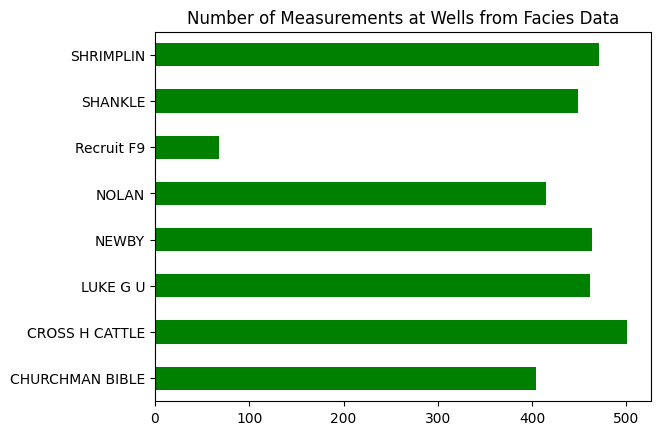

In [89]:
Well_Labels = ['CHURCHMAN BIBLE', 'CROSS H CATTLE', 'LUKE G U', 'NEWBY', 'NOLAN',
                 'Recruit F9', 'SHANKLE','SHRIMPLIN']

Measure_count = data['Well Name'].value_counts().sort_index()
Measure_count.index = Well_Labels

fig = plt.figure()
Measure_count.plot(kind='barh', color='green', title = 'Number of Measurements at Wells from Facies Data')

#### Melihat Distribusi Jumlah Masing-Masing Fasies Data

In [90]:
facies_colors = ['#F4D03F', '#F5B041','#DC7633','#6E2C00',
       '#1B4F72','#2E86C1', '#AED6F1', '#A569BD', '#196F3D']

facies_labels = ['SS', 'CSiS', 'FSiS', 'SiSh', 'MS',
                 'WS', 'D','PS', 'BS']

<Axes: title={'center': 'Distribution of Facies Data'}>

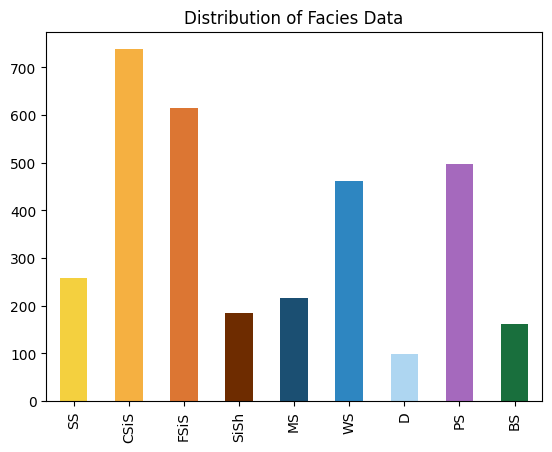

In [91]:
facies_color_map = {}
for ind, label in enumerate(facies_labels):
    facies_color_map[label] = facies_colors[ind]

fig=plt.figure()
facies_count = data['Facies'].value_counts().sort_index()
facies_count.index = ['SS', 'CSiS', 'FSiS', 'SiSh', 'MS',
                 'WS', 'D','PS', 'BS']

facies_count.plot(kind='bar',color=facies_colors,
                   title='Distribution of Facies Data')

In [92]:
facies_color_map

{'SS': '#F4D03F',
 'CSiS': '#F5B041',
 'FSiS': '#DC7633',
 'SiSh': '#6E2C00',
 'MS': '#1B4F72',
 'WS': '#2E86C1',
 'D': '#AED6F1',
 'PS': '#A569BD',
 'BS': '#196F3D'}

#### Membuat Label Fasies secara string

In [93]:
def label_facies (row, labels):
  return labels[row['Facies']-1]

data.loc[:,'Facies_Labels'] = data.apply(lambda row: label_facies(row, facies_labels), axis =1)

In [94]:
data.head()

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,Facies_Labels
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000,FSiS
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979,FSiS
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957,FSiS
3,3,A1 SH,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936,FSiS
4,3,A1 SH,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915,FSiS


In [95]:
data['Facies_Labels'].value_counts()

CSiS    738
FSiS    615
PS      498
WS      462
SS      259
MS      217
SiSh    184
BS      161
D        98
Name: Facies_Labels, dtype: int64

## Checking for Outlier

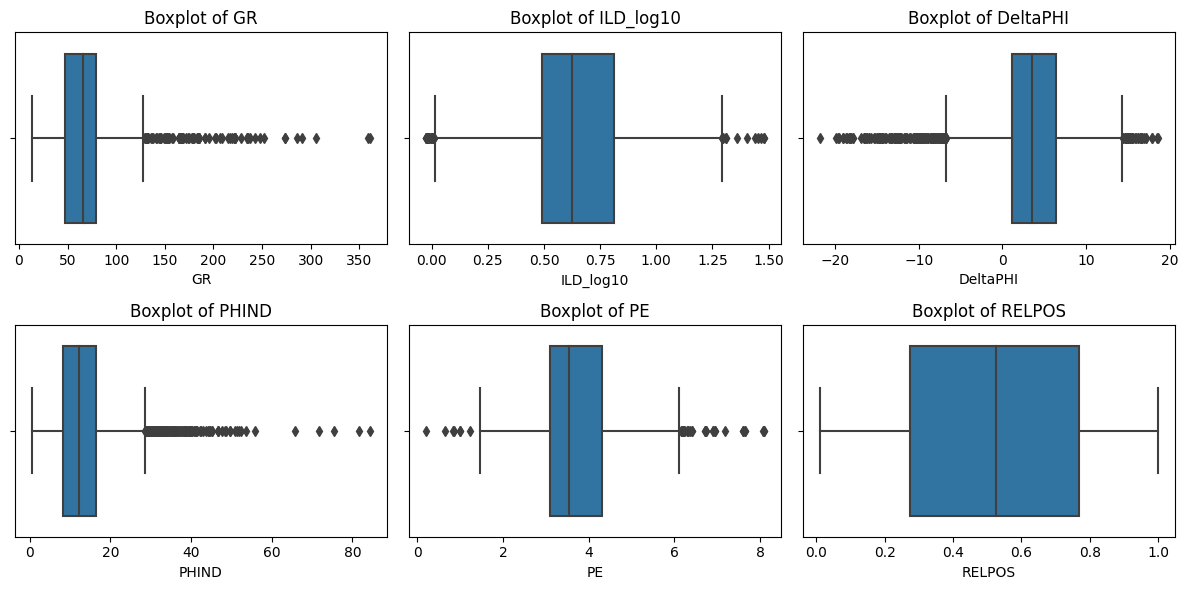

In [96]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize=(12,6))

axes = axes.flatten()
sns.boxplot(x = data["GR"], ax=axes[0])
axes[0].set_title("Boxplot of GR")

sns.boxplot(x = data["ILD_log10"], ax=axes[1])
axes[1].set_title("Boxplot of ILD_log10")

sns.boxplot(x = data["DeltaPHI"], ax=axes[2])
axes[2].set_title("Boxplot of DeltaPHI")

sns.boxplot(x = data["PHIND"], ax=axes[3])
axes[3].set_title("Boxplot of PHIND")

sns.boxplot(x = data["PE"], ax=axes[4])
axes[4].set_title("Boxplot of PE")

sns.boxplot(x = data["RELPOS"], ax=axes[5])
axes[5].set_title("Boxplot of RELPOS")

plt.tight_layout()
plt.show()

In [97]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3-Q1

<ipython-input-97-65e4787b25b1>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = data.quantile(0.25)
<ipython-input-97-65e4787b25b1>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = data.quantile(0.75)


In [98]:
data = data [~((data< (Q1-1.5*IQR))|(data>(Q3+1.5*IQR))).any(axis=1)]

<ipython-input-98-ec7b862e9728>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data = data [~((data< (Q1-1.5*IQR))|(data>(Q3+1.5*IQR))).any(axis=1)]


In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2844 entries, 0 to 3231
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Facies         2844 non-null   int64  
 1   Formation      2844 non-null   object 
 2   Well Name      2844 non-null   object 
 3   Depth          2844 non-null   float64
 4   GR             2844 non-null   float64
 5   ILD_log10      2844 non-null   float64
 6   DeltaPHI       2844 non-null   float64
 7   PHIND          2844 non-null   float64
 8   PE             2844 non-null   float64
 9   NM_M           2844 non-null   int64  
 10  RELPOS         2844 non-null   float64
 11  Facies_Labels  2844 non-null   object 
dtypes: float64(7), int64(2), object(3)
memory usage: 288.8+ KB


In [100]:
len(data)

2844

#### Mengubah Fitur-Fitur Menjadi Tipe Data Kategori

In [101]:
data['Well Name'] = data['Well Name'].astype('category')
data['Formation'] = data['Formation'].astype('category')

<ipython-input-101-b0ef38e26c64>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Well Name'] = data['Well Name'].astype('category')
<ipython-input-101-b0ef38e26c64>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Formation'] = data['Formation'].astype('category')


#### Melakukan Plottinng pada Salah Satu Sumur

In [102]:
def make_facies_log_plot(logs, facies_colors):
    #make sure logs are sorted by depth
    logs = logs.sort_values(by='Depth')
    cmap_facies = colors.ListedColormap(
            facies_colors[0:len(facies_colors)], 'indexed')

    ztop=logs.Depth.min(); zbot=logs.Depth.max()

    cluster=np.repeat(np.expand_dims(logs['Facies'].values,1), 100, 1)

    f, ax = plt.subplots(nrows=1, ncols=6, figsize=(12, 6))
    ax[0].plot(logs.GR, logs.Depth, '-g')
    ax[1].plot(logs.ILD_log10, logs.Depth, '-')
    ax[2].plot(logs.DeltaPHI, logs.Depth, '-', color='0.40')
    ax[3].plot(logs.PHIND, logs.Depth, '-', color='r')
    ax[4].plot(logs.PE, logs.Depth, '-', color='black')
    im=ax[5].imshow(cluster, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=9)

    divider = make_axes_locatable(ax[5])
    cax = divider.append_axes("right", size="20%", pad=0.05)
    cbar=plt.colorbar(im, cax=cax)
    cbar.set_label((5*' ').join([' SS ', 'CSiS', 'FSiS',
                                'SiSh', ' MS ', ' WS ', ' D  ',
                                ' PS ', ' BS ']))
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')

    for i in range(len(ax)-1):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)

    ax[0].set_xlabel("GR")
    ax[0].set_xlim(logs.GR.min(),logs.GR.max())
    ax[1].set_xlabel("ILD_log10")
    ax[1].set_xlim(logs.ILD_log10.min(),logs.ILD_log10.max())
    ax[2].set_xlabel("DeltaPHI")
    ax[2].set_xlim(logs.DeltaPHI.min(),logs.DeltaPHI.max())
    ax[3].set_xlabel("PHIND")
    ax[3].set_xlim(logs.PHIND.min(),logs.PHIND.max())
    ax[4].set_xlabel("PE")
    ax[4].set_xlim(logs.PE.min(),logs.PE.max())
    ax[5].set_xlabel('Facies')

    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]); ax[5].set_yticklabels([])
    ax[5].set_xticklabels([])
    f.suptitle('Well: %s'%logs.iloc[0]['Well Name'], fontsize=14,y=0.94)

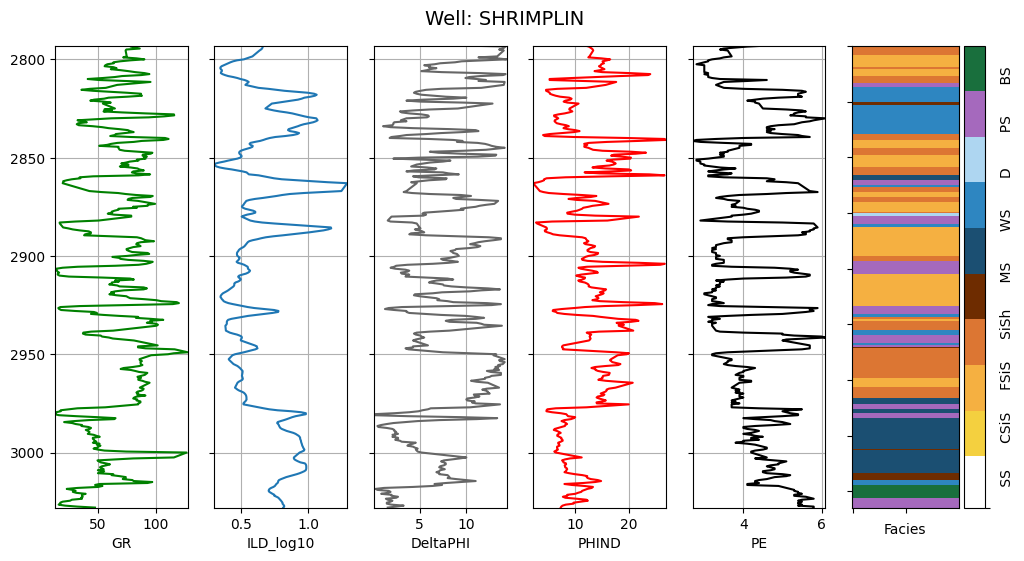

In [103]:
make_facies_log_plot(data[data["Well Name"]=='SHRIMPLIN'],facies_colors)

## Univariate Analysis

In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2844 entries, 0 to 3231
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Facies         2844 non-null   int64   
 1   Formation      2844 non-null   category
 2   Well Name      2844 non-null   category
 3   Depth          2844 non-null   float64 
 4   GR             2844 non-null   float64 
 5   ILD_log10      2844 non-null   float64 
 6   DeltaPHI       2844 non-null   float64 
 7   PHIND          2844 non-null   float64 
 8   PE             2844 non-null   float64 
 9   NM_M           2844 non-null   int64   
 10  RELPOS         2844 non-null   float64 
 11  Facies_Labels  2844 non-null   object  
dtypes: category(2), float64(7), int64(2), object(1)
memory usage: 251.0+ KB


In [105]:
numerical_features = data.select_dtypes(include=['float64','int64']).columns.tolist()
categorical_features = data.select_dtypes(include=['category']).columns.tolist()
numerical_features,categorical_features

(['Facies',
  'Depth',
  'GR',
  'ILD_log10',
  'DeltaPHI',
  'PHIND',
  'PE',
  'NM_M',
  'RELPOS'],
 ['Formation', 'Well Name'])

### Categorical Features

In [106]:
categorical_features[0]

'Formation'

In [107]:
for i in categorical_features:
  print (i)

Formation
Well Name




Statistics for Feature Formation:

       Number of Samples  Percentage
C LM                 442        15.5
A1 LM                425        14.9
A1 SH                305        10.7
C SH                 238         8.4
B1 SH                234         8.2
B5 LM                214         7.5
B4 SH                207         7.3
B3 SH                203         7.1
B2 SH                145         5.1
B1 LM                140         4.9
B2 LM                114         4.0
B4 LM                 68         2.4
B3 LM                 57         2.0
B5 SH                 52         1.8


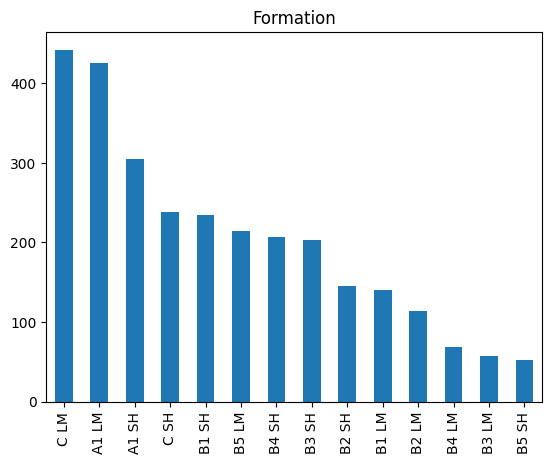



Statistics for Feature Well Name:

                 Number of Samples  Percentage
NEWBY                          430        15.1
LUKE G U                       428        15.0
CROSS H CATTLE                 420        14.8
SHRIMPLIN                      415        14.6
NOLAN                          396        13.9
SHANKLE                        380        13.4
CHURCHMAN BIBLE                323        11.4
Recruit F9                      52         1.8


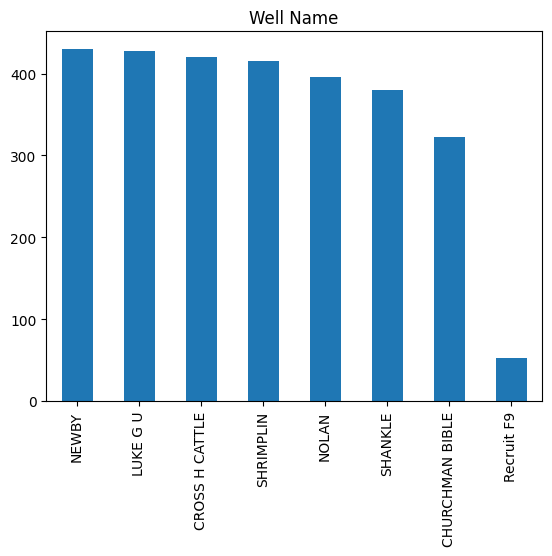

In [108]:
for feature in categorical_features:
  count = data[feature].value_counts()
  percent = 100*data[feature].value_counts(normalize=True)

  df = pd.DataFrame({'Number of Samples':count, 'Percentage':percent.round(1)})
  print('\n')
  print(f"Statistics for Feature {feature}:\n")
  print(df)
  count.plot(kind='bar', title = feature)

  plt.show()

### Numerical Features

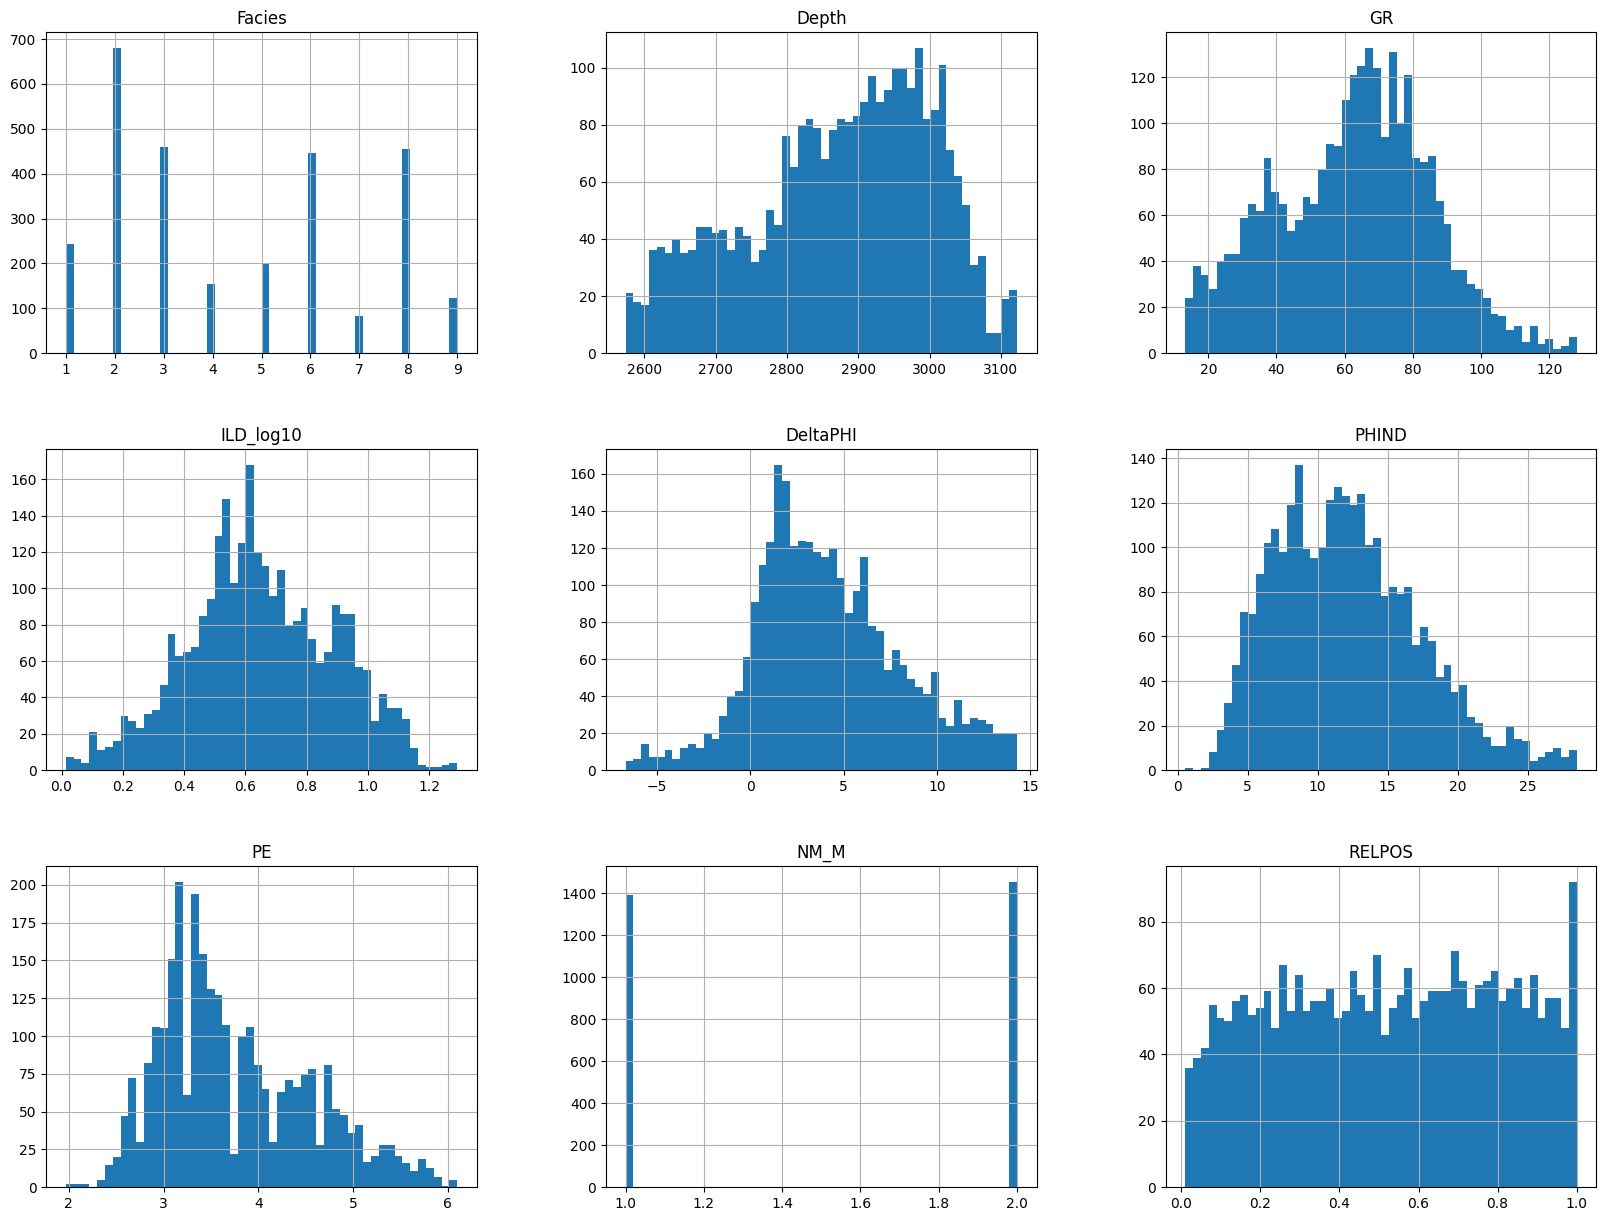

In [109]:
data.hist(bins=50,figsize=(20,15))
plt.show()

## Multivariate Analysis
### Numerical Features

In [110]:
data.head()

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,Facies_Labels
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000,FSiS
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979,FSiS
3,3,A1 SH,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936,FSiS
4,3,A1 SH,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915,FSiS
5,3,A1 SH,SHRIMPLIN,2795.5,73.97,0.636,14.0,13.385,3.6,1,0.894,FSiS


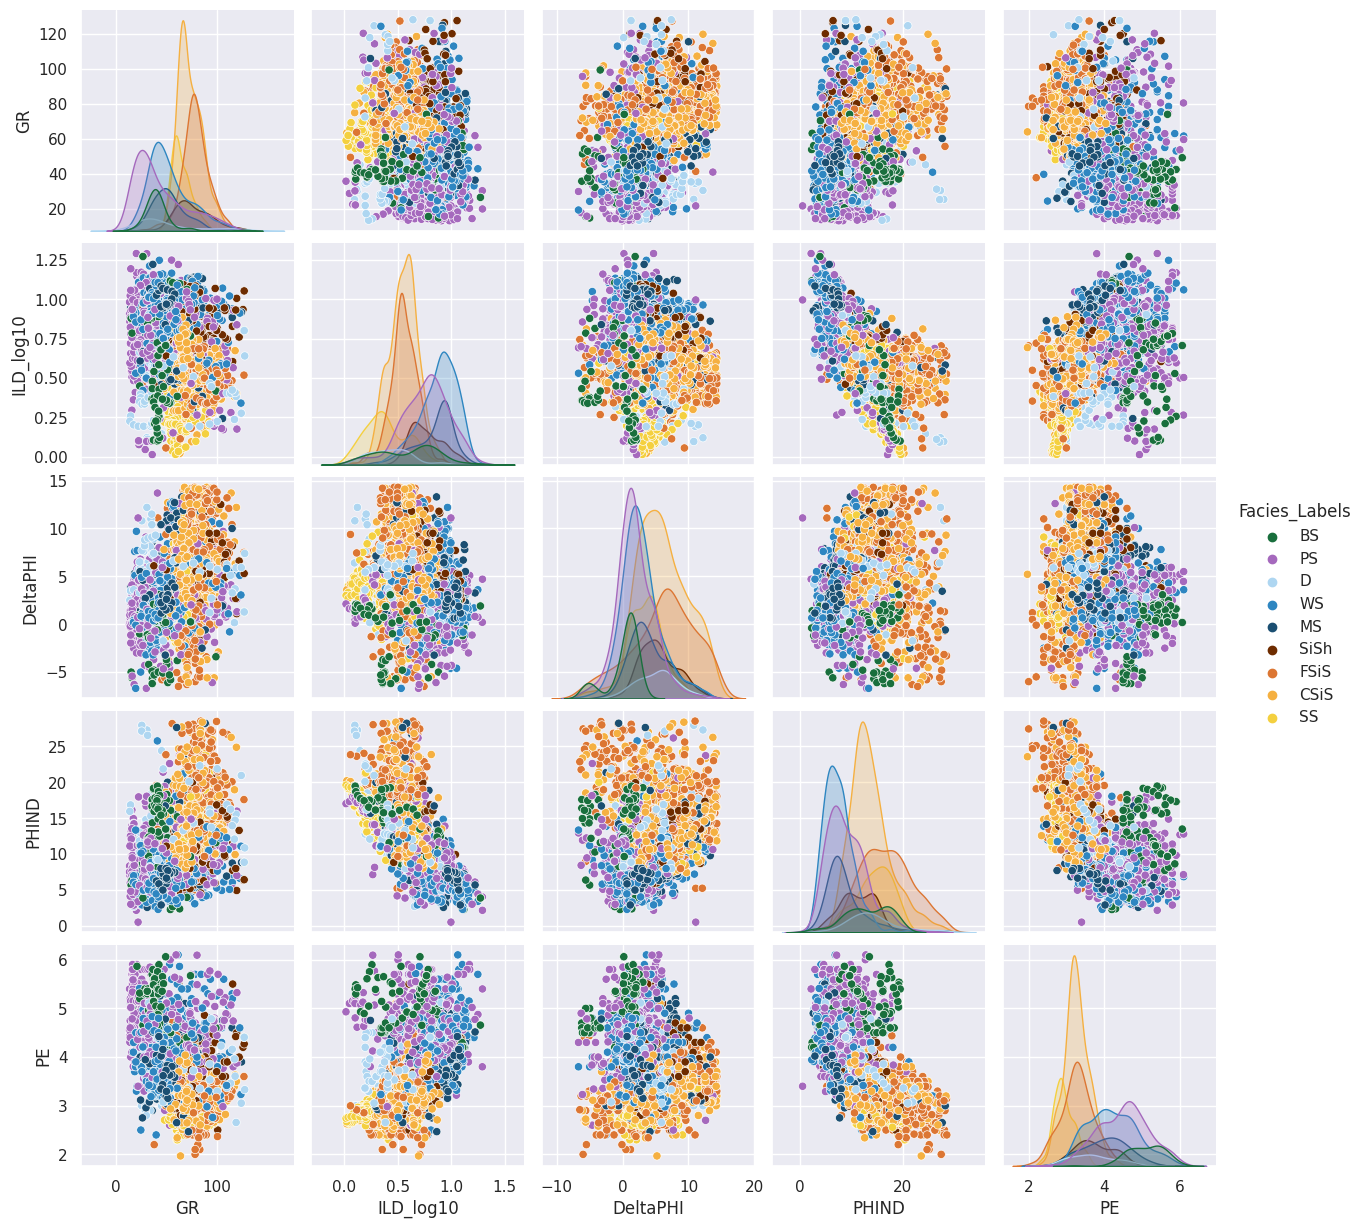

In [111]:
sns.set()
sns.pairplot(data.drop(['Facies','Depth','NM_M','RELPOS'],axis=1),
             hue='Facies_Labels', palette=facies_color_map,
             hue_order=list(reversed(facies_labels)))

## Crossplot Analysis
Crossplot dilakukan untuk melihat hubungan antara 1 variabel terhadap variabel lainnya dalam koordinat kartesius

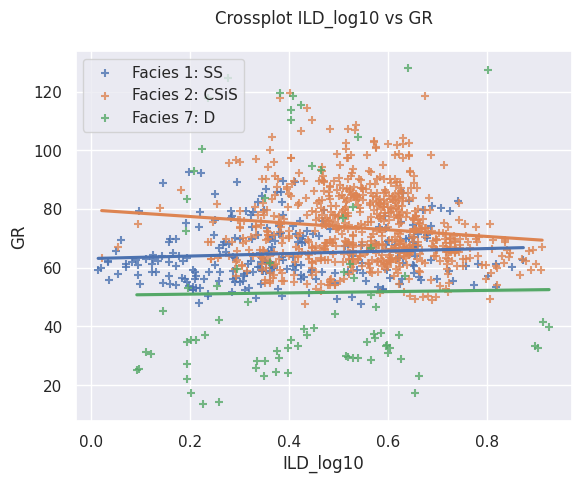

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('ILD_log10')

for i in (1, 2, 7):
    subset = data[data['Facies'] == i]
    x = subset['ILD_log10']
    y = subset['GR']
    label = f"Facies {i}: " + (facies_labels[i-1])
    sns.regplot(x=x, y=y, marker='+', label=label, ci=1)

ax.legend(loc='best')
plt.title('Crossplot ILD_log10 vs GR', pad = 20)
plt.show()

<ipython-input-113-dd6116dc3f7f>:10: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  x = pd.np.log10(subset['PHIND'])


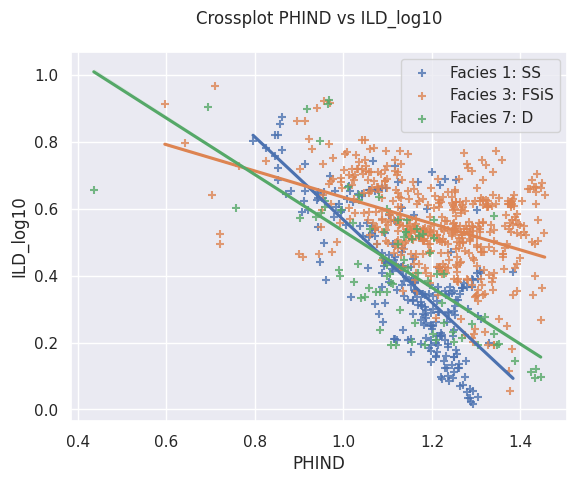

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('PHIND')

for i in (1, 3, 7):
    subset = data[data['Facies'] == i]
    x = pd.np.log10(subset['PHIND'])
    y = subset['ILD_log10']
    label = f"Facies {i}: " + (facies_labels[i-1])
    sns.regplot(x=x, y=y, marker='+', label=label, ci=1)

ax.legend(loc='best')
plt.title('Crossplot PHIND vs ILD_log10', pad = 20)
plt.show()

## Correlation Matrix

<ipython-input-114-93ce1fcb87a0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr().round(2)


Text(0.5, 1.0, 'Correlation Matrix for Numerical Features')

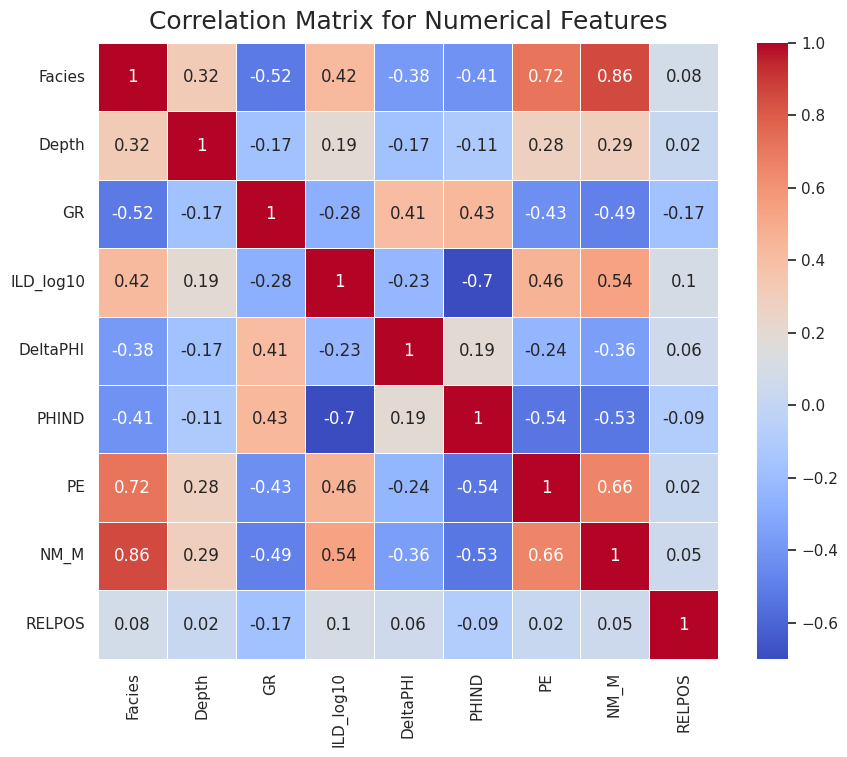

In [114]:
plt.figure(figsize=(10,8))
corr_matrix = data.corr().round(2)

sns.heatmap(data = corr_matrix, annot = True, cmap = 'coolwarm', linewidth = 0.4)
plt.title('Correlation Matrix for Numerical Features', size = 18, pad = 10)

# DATA PREPARATION

## Feature Augmentation & Splitting Data

In [115]:
# Code borrowed from Top winner LA Team https://github.com/seg/2016-ml-contest/blob/master/LA_Team/
# Feature windows concatenation function
def augment_features_window(X, N_neig):

    # Parameters
    N_row = X.shape[0]
    N_feat = X.shape[1]

    # Zero padding
    X = np.vstack((np.zeros((N_neig, N_feat)), X, (np.zeros((N_neig, N_feat)))))

    # Loop over windows
    X_aug = np.zeros((N_row, N_feat*(2*N_neig+1)))
    for r in np.arange(N_row)+N_neig:
        this_row = []
        for c in np.arange(-N_neig,N_neig+1):
            this_row = np.hstack((this_row, X[r+c]))
        X_aug[r-N_neig] = this_row

    return X_aug


# Feature gradient computation function
def augment_features_gradient(X, depth):

    # Compute features gradient
    d_diff = np.diff(depth).reshape((-1, 1))
    d_diff[d_diff==0] = 0.001
    X_diff = np.diff(X, axis=0)
    X_grad = X_diff / d_diff

    # Compensate for last missing value
    X_grad = np.concatenate((X_grad, np.zeros((1, X_grad.shape[1]))))

    return X_grad

# Feature augmentation function
def augment_features(X, well, depth, N_neig=1):
#def augment_features(X, well, depth, N_neig=0):

    # Augment features
    X_aug = np.zeros((X.shape[0], X.shape[1]*(N_neig*2+2)))
    for w in np.unique(well):
        w_idx = np.where(well == w)[0]
        X_aug_win = augment_features_window(X[w_idx, :], N_neig)
        X_aug_grad = augment_features_gradient(X[w_idx, :], depth[w_idx])
        X_aug[w_idx, :] = np.concatenate((X_aug_win, X_aug_grad), axis=1)

    # Find padded rows
    padded_rows = np.unique(np.where(X_aug[:, 0:7] == np.zeros((1, 7)))[0])

    return X_aug, padded_rows

In [116]:
# SPLITTING DATA FOR TRAINING (TRAINING AND VALIDATION) AND TESTING
facies_train = data[data['Well Name']!='NEWBY']
facies_test = data[data['Well Name']=='NEWBY']

In [117]:
len(facies_train), len(facies_test), facies_train.shape, facies_test.shape

(2414, 430, (2414, 12), (430, 12))

In [118]:
features = ['GR', 'ILD_log10', 'DeltaPHI','PHIND','PE','NM_M', 'RELPOS']
data_train = facies_train[features].values
label_train = facies_train['Facies'].values

data_test = facies_test[features].values
label_test = facies_test['Facies'].values

#Make Variable to Store Value
well_train = facies_train['Well Name'].values
depth_train = facies_train['Depth'].values

well_test = facies_test['Well Name'].values
depth_test = facies_test['Depth'].values

In [119]:
data_train.shape, data_test.shape

((2414, 7), (430, 7))

In [120]:
X_aug_train, padded_rows_train = augment_features(data_train, well_train, depth_train)
X_aug_test, padded_rows_test = augment_features(data_test, well_test, depth_test)

In [121]:
X_aug_train.shape, X_aug_test.shape

((2414, 28), (430, 28))

## Standarization

In [122]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_aug_train)
scaled_X_train = scaler.transform(X_aug_train)
scaled_X_test = scaler.transform (X_aug_test)

#### Splitting Data untuk digunakan dalam proses training

In [123]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(scaled_X_train,label_train, test_size = 0.1, stratify=label_train)

In [124]:
X_train.shape, X_test.shape

((2172, 28), (242, 28))

# MODEL DEVELOPMENT

## Grid Search and RandomSearch
Dilakukan untuk menentukan parameter terbaik dalam suatu algoritma

In [125]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

from sklearn.model_selection import ShuffleSplit

from sklearn import ensemble
from sklearn.neighbors import KNeighborsClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.svm import SVC

In [126]:
algorithm = {
      'knn':{
          'model' : KNeighborsClassifier(),
          'params':{ 'n_neighbors' : [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
                    'weights' : ['uniform', 'distance']

          }
      },
      'random_forest' :{
          'model': ensemble.RandomForestClassifier(),
          'params':{'max_depth' : [2, 3, 4],
                    'n_estimators' : [100, 500, 1000],
                    'random_state': [11, 33, 55, 77]
          }
      },
      'svm':{
          'model':SVC(),
          'params':{'C': [0.01, 1, 5, 10, 20, 50, 100, 1000, 5000, 10000],
                       'gamma' : [0.0001, 0.001, 0.01, 0.1, 1, 10]
          }
      },
      'boosting': {
            'model': ensemble.AdaBoostClassifier(),
            'params': {
                'learning_rate' : [0.1, 0.05, 0.01, 0.05, 0.001],
                'n_estimators': [25, 50, 75, 100],
                'random_state': [11, 33, 55, 77]
          }
      },
      'XGBoost':{
          'model': XGBClassifier(),
          'params':{'max_depth' : [2, 3, 4],
                    'learning_rate' : [0.001, 0.01, 0.1, 0.2, 0.4],
                    'n_estimators':[100, 500, 1000],
                    'subsample' : [0.2, 0.6, 1]
          }
      }
  }

In [127]:
# Create a list of dictionaries for each algorithm
data = [{'Algorithm': algo, 'Parameters': model['params']} for algo, model in algorithm.items()]

# Create a DataFrame from the list of dictionaries
df = pd.DataFrame(data)

# Display the DataFrame
print(df)

       Algorithm                                         Parameters
0            knn  {'n_neighbors': [5, 6, 7, 8, 9, 10, 11, 12, 13...
1  random_forest  {'max_depth': [2, 3, 4], 'n_estimators': [100,...
2            svm  {'C': [0.01, 1, 5, 10, 20, 50, 100, 1000, 5000...
3       boosting  {'learning_rate': [0.1, 0.05, 0.01, 0.05, 0.00...
4        XGBoost  {'max_depth': [2, 3, 4], 'learning_rate': [0.0...


In [128]:
# scores = []
# cv = ShuffleSplit(n_splits=5, test_size=0.02, random_state=123)
# for algorithm_name, config in algorithm.items():
#   grid_search =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
#   grid_search.fit(X_train,y_train)
#   scores.append({
#         'model': algorithm_name,
#         'best_score': grid_search.best_score_,
#         'best_params': grid_search.best_params_
#       })

# GS_result = pd.DataFrame(scores,columns=['Model','Best_score','Best_Parameter'])

#### KNN Model

In [129]:
cv = ShuffleSplit(n_splits=5, test_size=0.02, random_state=123)

knn_model = algorithm['knn']['model']
knn_params = algorithm['knn']['params']
knn_search = GridSearchCV(
    knn_model,
    knn_params,
    cv=cv,
    verbose=1,
    n_jobs=-1,
)
knn_search.fit(X_train, y_train)
knn_best_params = knn_search.best_params_

print(knn_best_params)

Fitting 5 folds for each of 22 candidates, totalling 110 fits
{'n_neighbors': 6, 'weights': 'distance'}


#### Random Forest Model

In [130]:
rf_model = algorithm['random_forest']['model']
rf_params = algorithm['random_forest']['params']
rf_search = RandomizedSearchCV(
    rf_model,
    rf_params,
    cv=3,
    verbose=1,
    n_jobs=-1,
)
rf_search.fit(X_train, y_train)
rf_best_params = rf_search.best_params_

print(rf_best_params)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
{'random_state': 33, 'n_estimators': 500, 'max_depth': 4}


### SVM Model

In [131]:
svm_model = algorithm['svm']['model']
svm_params = algorithm['svm']['params']
svm_search = RandomizedSearchCV(
    svm_model,
    svm_params,
    cv = 3,
    verbose=1,
    n_jobs=-1,
)
svm_search.fit(X_train, y_train)
svm_best_params = svm_search.best_params_

print(svm_best_params)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
{'gamma': 0.1, 'C': 10}


#### AdaBoosting Model

In [132]:
boost_model = algorithm['boosting']['model']
boost_params = algorithm['boosting']['params']
boost_search = RandomizedSearchCV(
    boost_model,
    boost_params,
    cv=3,
    verbose=1,
    n_jobs=-1,
)
boost_search.fit(X_train, y_train)
boost_best_params = boost_search.best_params_

print(boost_best_params)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
{'random_state': 55, 'n_estimators': 25, 'learning_rate': 0.05}


#### XGBoost Model

In [133]:
y_trainxg = np.array(y_train)-1
xgboost_model = algorithm['XGBoost']['model']
xgboost_params = algorithm['XGBoost']['params']
xgboost_search = RandomizedSearchCV(
    xgboost_model,
    xgboost_params,
    cv=3,
    verbose=1,
    n_jobs=-1,
)
xgboost_search.fit(X_train, y_trainxg)
xgboost_best_params = xgboost_search.best_params_

print(xgboost_best_params)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
{'subsample': 1, 'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.1}


In [135]:
from IPython.core.display import HTML

results_data = {
    'Algorithm': ['knn', 'random_forest','svm','AdaBoost','XGBoost'],
    'Best Parameters': [knn_best_params, rf_best_params,svm_best_params,boost_best_params,xgboost_best_params]
}

# Creating DataFrame
results_df = pd.DataFrame(results_data)

pd.set_option('display.max_colwidth', None)
html_table = results_df.to_html(index=False)

# Display the HTML table horizontally
display(HTML(html_table))

Algorithm,Best Parameters
knn,"{'n_neighbors': 6, 'weights': 'distance'}"
random_forest,"{'random_state': 33, 'n_estimators': 500, 'max_depth': 4}"
svm,"{'gamma': 0.1, 'C': 10}"
AdaBoost,"{'random_state': 55, 'n_estimators': 25, 'learning_rate': 0.05}"
XGBoost,"{'subsample': 1, 'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.1}"


# Training with Model with Best Parameter
Setelah diperoleh parameter terbaik pada masing-masing algoritma, maka dilakukan proses training dengan paramater tersebut

In [136]:
# Prepare dataframe for model analysis
models = pd.DataFrame(index = ['train_acc','test_acc'],
                      columns = ['KNN','RandomForest','SVM','Boosting','XGBoost'])

In [137]:
models

,KNN,RandomForest,SVM,Boosting,XGBoost
train_acc,NaN,NaN,NaN,NaN,NaN
test_acc,NaN,NaN,NaN,NaN,NaN


In [138]:
target_names = ['SS', 'CSiS', 'FSiS', 'SiSh','MS', 'WS', 'D','PS', 'BS']

### KNN

In [139]:
from sklearn.metrics import accuracy_score, classification_report

knn = KNeighborsClassifier(n_neighbors = 6, weights = 'distance')
knn.fit(X_train,y_train)

models.loc['train_acc','KNN'] = accuracy_score(y_true = y_train, y_pred = knn.predict(X_train))
models.loc['test_acc','KNN'] = accuracy_score(y_true= y_test, y_pred = knn.predict(X_test))

In [140]:
models

,KNN,RandomForest,SVM,Boosting,XGBoost
train_acc,1.0,NaN,NaN,NaN,NaN
test_acc,0.706612,NaN,NaN,NaN,NaN


In [141]:
print (classification_report(y_test, knn.predict(X_test), target_names=target_names))

              precision    recall  f1-score   support

          SS       0.75      0.75      0.75        24
        CSiS       0.78      0.86      0.82        59
        FSiS       0.88      0.74      0.80        38
        SiSh       0.67      0.80      0.73        10
          MS       0.60      0.53      0.56        17
          WS       0.51      0.58      0.55        36
           D       1.00      0.71      0.83         7
          PS       0.61      0.56      0.58        41
          BS       0.80      0.80      0.80        10

    accuracy                           0.71       242
   macro avg       0.73      0.70      0.71       242
weighted avg       0.71      0.71      0.71       242



### Random Forest

In [142]:
RF = ensemble.RandomForestClassifier(max_depth = 4, n_estimators = 100,random_state =77 )
RF.fit(X_train, y_train)

models.loc['train_acc','RandomForest'] = accuracy_score(y_true = y_train, y_pred = RF.predict(X_train))
models.loc['test_acc','RandomForest'] = accuracy_score(y_true= y_test, y_pred = RF.predict(X_test))

In [143]:
models

,KNN,RandomForest,SVM,Boosting,XGBoost
train_acc,1.0,0.656538,NaN,NaN,NaN
test_acc,0.706612,0.570248,NaN,NaN,NaN


In [144]:
print (classification_report(y_test, RF.predict(X_test), target_names=target_names))

              precision    recall  f1-score   support

          SS       0.67      0.42      0.51        24
        CSiS       0.59      0.81      0.68        59
        FSiS       0.65      0.39      0.49        38
        SiSh       1.00      0.10      0.18        10
          MS       1.00      0.12      0.21        17
          WS       0.44      0.78      0.56        36
           D       1.00      0.43      0.60         7
          PS       0.57      0.68      0.62        41
          BS       1.00      0.30      0.46        10

    accuracy                           0.57       242
   macro avg       0.77      0.45      0.48       242
weighted avg       0.65      0.57      0.54       242



### SVM

In [145]:
SVM = SVC(gamma = 0.1, C=1000 )
SVM.fit(X_train, y_train)

models.loc['train_acc','SVM'] = accuracy_score(y_true = y_train, y_pred = SVM.predict(X_train))
models.loc['test_acc','SVM'] = accuracy_score(y_true= y_test, y_pred = SVM.predict(X_test))

In [146]:
models

,KNN,RandomForest,SVM,Boosting,XGBoost
train_acc,1.0,0.656538,1.0,NaN,NaN
test_acc,0.706612,0.570248,0.743802,NaN,NaN


In [147]:
print (classification_report(y_test, SVM.predict(X_test), target_names=target_names))

              precision    recall  f1-score   support

          SS       0.76      0.79      0.78        24
        CSiS       0.79      0.78      0.79        59
        FSiS       0.71      0.79      0.75        38
        SiSh       0.75      0.60      0.67        10
          MS       0.65      0.65      0.65        17
          WS       0.69      0.67      0.68        36
           D       1.00      0.86      0.92         7
          PS       0.70      0.76      0.73        41
          BS       1.00      0.70      0.82        10

    accuracy                           0.74       242
   macro avg       0.78      0.73      0.75       242
weighted avg       0.75      0.74      0.74       242



### Boosting

In [148]:
from sklearn.metrics import accuracy_score, classification_report

AdaBoost = ensemble.AdaBoostClassifier(learning_rate = 0.05, n_estimators =25,random_state=33 )
AdaBoost.fit(X_train,y_train)

models.loc['train_acc','Boosting'] = accuracy_score(y_true = y_train, y_pred = AdaBoost.predict(X_train))
models.loc['test_acc','Boosting'] = accuracy_score(y_true= y_test, y_pred = AdaBoost.predict(X_test))

In [149]:
models

,KNN,RandomForest,SVM,Boosting,XGBoost
train_acc,1.0,0.656538,1.0,0.474678,NaN
test_acc,0.706612,0.570248,0.743802,0.491736,NaN


In [150]:
 print (classification_report(y_test, AdaBoost.predict(X_test), target_names=target_names))

              precision    recall  f1-score   support

          SS       0.00      0.00      0.00        24
        CSiS       0.50      0.97      0.66        59
        FSiS       0.83      0.13      0.23        38
        SiSh       0.00      0.00      0.00        10
          MS       0.00      0.00      0.00        17
          WS       0.48      0.72      0.58        36
           D       0.00      0.00      0.00         7
          PS       0.46      0.76      0.57        41
          BS       0.00      0.00      0.00        10

    accuracy                           0.49       242
   macro avg       0.25      0.29      0.23       242
weighted avg       0.40      0.49      0.38       242



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### XGBoost

In [151]:
y_trainxg = np.array(y_train)-1
X_trainxg = np.array(X_train)-1
y_testxg = np.array(y_test)-1
X_testxg = np.array(X_test)-1
XGBoost = XGBClassifier(sub_sample =1 , max_depth = 3,learning_rate = 0.4, n_estimators =1000 )
XGBoost.fit(X_trainxg,y_trainxg)

models.loc['train_acc','XGBoost'] = accuracy_score(y_true = y_trainxg, y_pred = XGBoost.predict(X_trainxg))
models.loc['test_acc','XGBoost'] = accuracy_score(y_true= y_testxg, y_pred = XGBoost.predict(X_testxg))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [08:36:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "sub_sample" } are not used.

  warnings.warn(smsg, UserWarning)


In [152]:
models

,KNN,RandomForest,SVM,Boosting,XGBoost
train_acc,1.0,0.656538,1.0,0.474678,1.0
test_acc,0.706612,0.570248,0.743802,0.491736,0.797521


In [153]:
print(classification_report(y_testxg,XGBoost.predict(X_testxg),target_names=target_names, digits=3))

              precision    recall  f1-score   support

          SS      0.955     0.875     0.913        24
        CSiS      0.869     0.898     0.883        59
        FSiS      0.795     0.816     0.805        38
        SiSh      0.571     0.800     0.667        10
          MS      0.917     0.647     0.759        17
          WS      0.698     0.833     0.759        36
           D      0.833     0.714     0.769         7
          PS      0.737     0.683     0.709        41
          BS      0.857     0.600     0.706        10

    accuracy                          0.798       242
   macro avg      0.803     0.763     0.774       242
weighted avg      0.807     0.798     0.798       242



# Evaluation

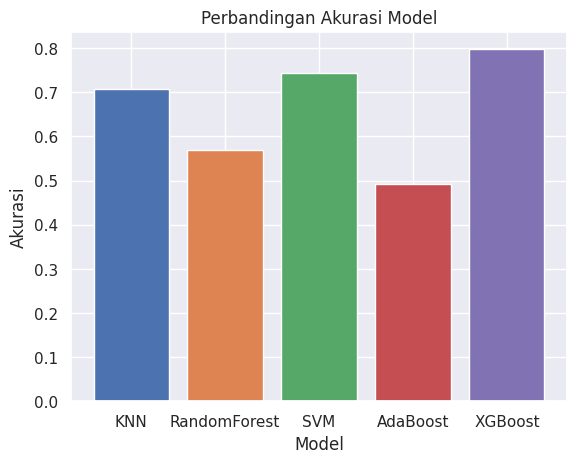

In [154]:

# Menampilkan perbandingan akurasi beberapa model yang telah dibuat
plt.bar('KNN', models.loc['test_acc','KNN'])
plt.bar('RandomForest', models.loc['test_acc','RandomForest'])
plt.bar('SVM', models.loc['test_acc','SVM'])
plt.bar('AdaBoost', models.loc['test_acc','Boosting'])
plt.bar('XGBoost', models.loc['test_acc','XGBoost'])
plt.title("Perbandingan Akurasi Model");
plt.xlabel('Model');
plt.ylabel('Akurasi');
plt.show()

Setelah dilakukan proses training dan dilakukan pengukuran accuracy pada data validasi, diperoleh XG Boost, SVM, dan KNN merupakan model terbaik secara berurutan

# Model Prediction Using Data Test

#### Data test yang digunakan adalah data pada sumur NEWBY

In [155]:
facies_test

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,Facies_Labels
2365,3,A1 SH,NEWBY,2826.0,76.34,0.719,7.8,11.00,3.7,1,1.000,FSiS
2366,3,A1 SH,NEWBY,2826.5,83.74,0.688,9.7,12.55,3.4,1,0.977,FSiS
2367,3,A1 SH,NEWBY,2827.0,83.19,0.664,10.1,11.95,3.4,1,0.953,FSiS
2368,3,A1 SH,NEWBY,2827.5,80.44,0.648,10.1,11.15,3.4,1,0.930,FSiS
2369,3,A1 SH,NEWBY,2828.0,75.42,0.648,9.3,11.45,3.3,1,0.907,FSiS
...,...,...,...,...,...,...,...,...,...,...,...,...
2823,6,C LM,NEWBY,3055.0,66.94,0.838,4.0,8.00,4.2,2,0.292,WS
2824,6,C LM,NEWBY,3055.5,54.06,0.823,1.9,5.45,4.3,2,0.281,WS
2825,6,C LM,NEWBY,3056.0,47.87,0.797,0.7,4.85,4.4,2,0.270,WS
2826,6,C LM,NEWBY,3056.5,49.34,0.763,2.3,4.85,4.1,2,0.258,WS


#### Membuat plot untuk membandingkan hasil prediksi fasies batuan dan label aslinya

In [167]:
def compare_facies_plot(logs, compadre, facies_colors):
    #make sure logs are sorted by depth
    logs = logs.sort_values(by='Depth')
    cmap_facies = colors.ListedColormap(
            facies_colors[0:len(facies_colors)], 'indexed')

    ztop=logs.Depth.min(); zbot=logs.Depth.max()

    cluster1 = np.repeat(np.expand_dims(logs['Facies'].values,1), 100, 1)
    cluster2 = np.repeat(np.expand_dims(logs[compadre].values,1), 100, 1)

    f, ax = plt.subplots(nrows=1, ncols=7, figsize=(9, 12))
    ax[0].plot(logs.GR, logs.Depth, '-g')
    ax[1].plot(logs.ILD_log10, logs.Depth, '-')
    ax[2].plot(logs.DeltaPHI, logs.Depth, '-', color='0.5')
    ax[3].plot(logs.PHIND, logs.Depth, '-', color='r')
    ax[4].plot(logs.PE, logs.Depth, '-', color='black')
    im1 = ax[5].imshow(cluster1, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=9)
    im2 = ax[6].imshow(cluster2, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=9)

    divider = make_axes_locatable(ax[6])
    cax = divider.append_axes("right", size="20%", pad=0.05)
    cbar=plt.colorbar(im2, cax=cax)
    cbar.set_label((17*' ').join([' SS ', 'CSiS', 'FSiS',
                                'SiSh', ' MS ', ' WS ', ' D  ',
                                ' PS ', ' BS ']))
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')

    for i in range(len(ax)-2):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)

    ax[0].set_xlabel("GR")
    ax[0].set_xlim(logs.GR.min(),logs.GR.max())
    ax[1].set_xlabel("ILD_log10")
    ax[1].set_xlim(logs.ILD_log10.min(),logs.ILD_log10.max())
    ax[2].set_xlabel("DeltaPHI")
    ax[2].set_xlim(logs.DeltaPHI.min(),logs.DeltaPHI.max())
    ax[3].set_xlabel("PHIND")
    ax[3].set_xlim(logs.PHIND.min(),logs.PHIND.max())
    ax[4].set_xlabel("PE")
    ax[4].set_xlim(logs.PE.min(),logs.PE.max())
    ax[5].set_xlabel('Facies')
    ax[6].set_xlabel(compadre)

    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]); ax[5].set_yticklabels([])
    ax[5].set_xticklabels([])
    ax[6].set_xticklabels([])
    f.suptitle('Well: %s'%logs.iloc[0]['Well Name'], fontsize=14,y=0.94)

#### Prediksi dengan SVM

In [157]:
y_pred2 = SVM.predict(scaled_X_test)

In [158]:
facies_test ['pred_SVM'] = y_pred2

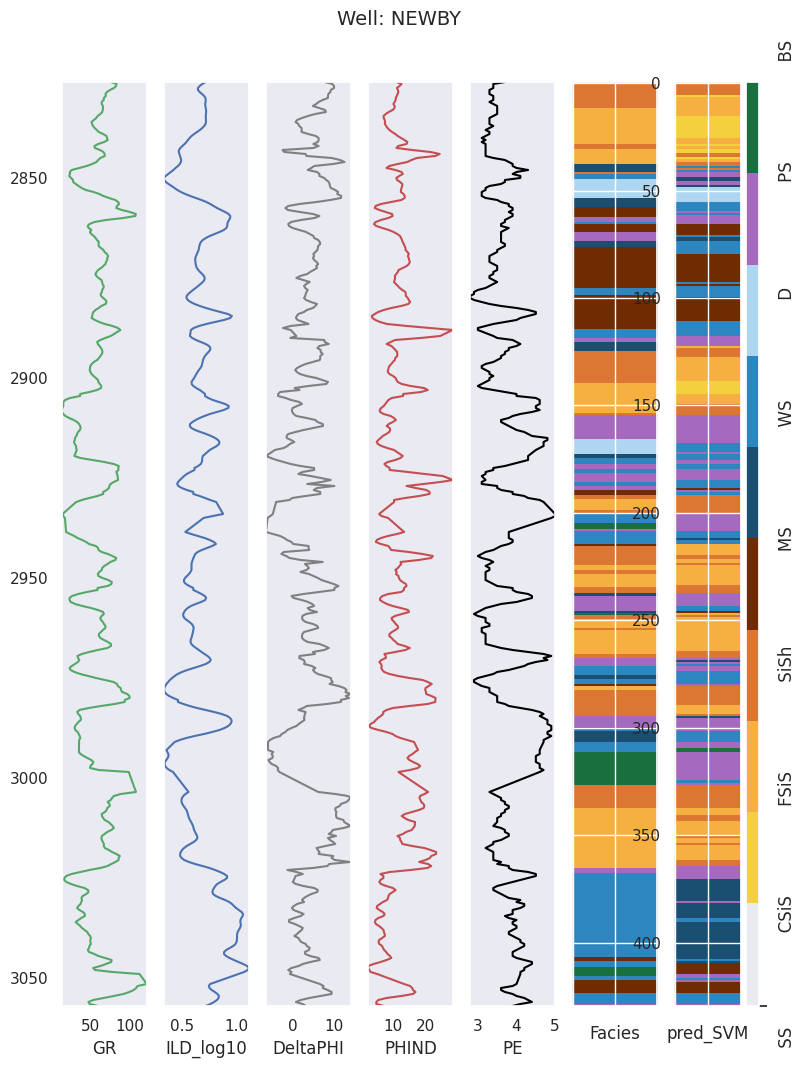

In [168]:
compare_facies_plot(facies_test.sort_values(by='Depth'), 'pred_SVM', facies_colors)

#### Prediksi dengan KNN

In [160]:
y_pred = knn.predict(scaled_X_test)

In [161]:
facies_test ['pred_KNN'] = y_pred

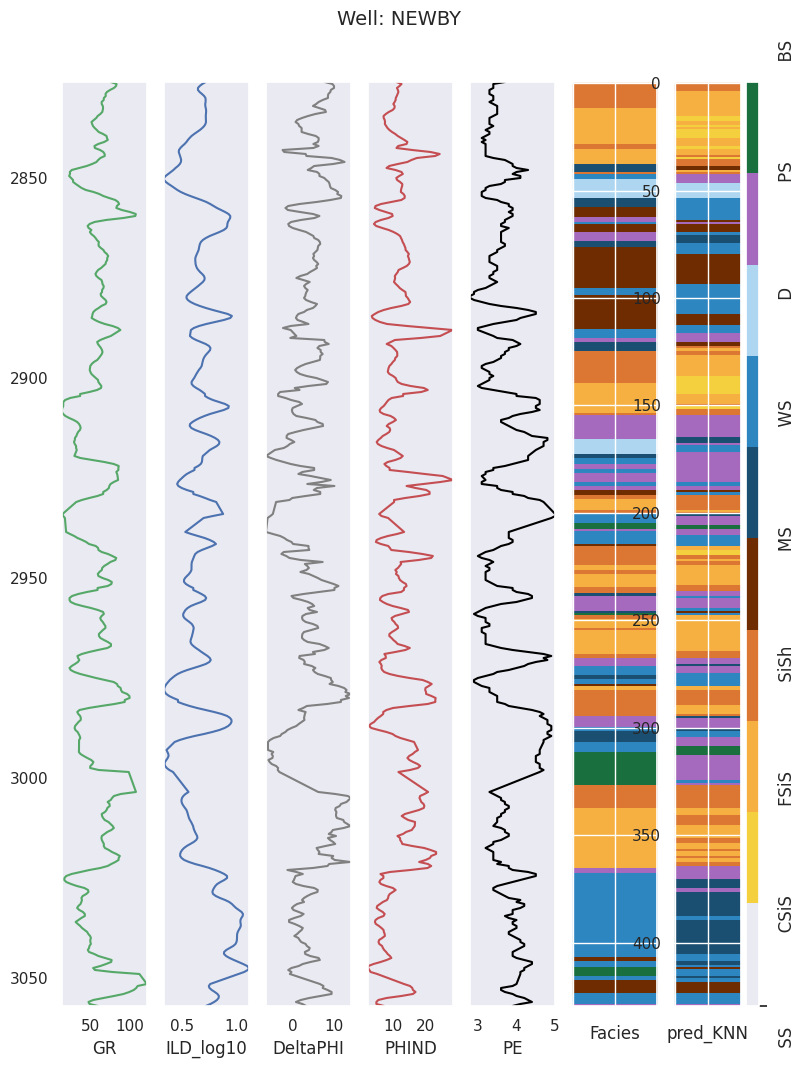

In [162]:
compare_facies_plot(facies_test.sort_values(by='Depth'), 'pred_KNN', facies_colors)

### Prediksi dengan XGBoost

In [163]:
X_predxg = np.array(scaled_X_test)-1

In [164]:
y_predxg = XGBoost.predict(X_predxg )

In [165]:
facies_test ['pred_XGBoost'] = y_predxg+1

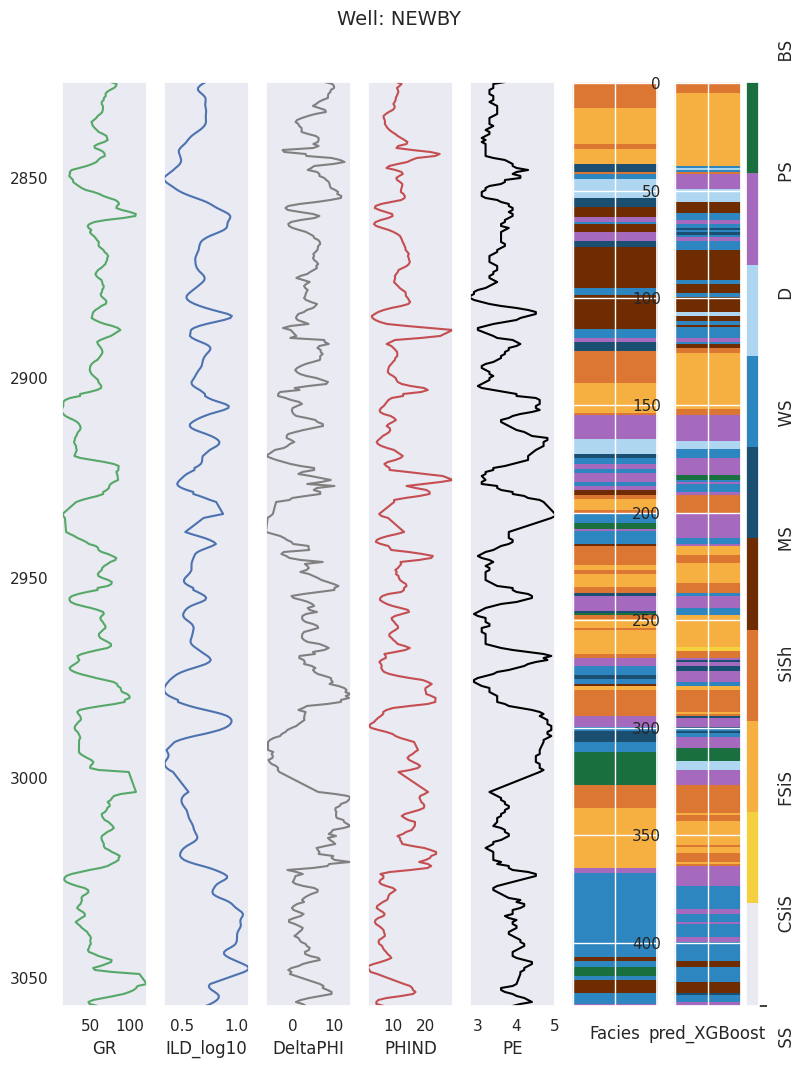

In [166]:
compare_facies_plot(facies_test.sort_values(by='Depth'), 'pred_XGBoost', facies_colors)